In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import holidays

/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
df = pd.read_csv("../data/final_tables/banc/banc.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
# Select the country for which you want to check holidays
us_holidays = holidays.UnitedStates()
# Create a new column in your DataFrame to indicate if a date is a holiday
df['is_holiday'] = df['timestamp'].apply(lambda x: 1 if x in us_holidays else 0)
df.head()

,timestamp,Demand (MWh),Demand Forecast (MWh),Net Generation (MWh),Region,Normalized Demand,temperature,humidity,cloudcover,windspeed,day_of_week,hour,month,is_holiday
0,2015-07-01 01:00:00,2513.0,2226.0,1559.0,banc,0.972796,38.5,18,10,8.7,2,1,7,0
1,2015-07-01 02:00:00,2275.0,2035.0,1441.0,banc,0.524716,37.7,19,12,10.4,2,2,7,0
2,2015-07-01 03:00:00,2104.0,1897.0,1399.0,banc,0.202776,35.4,23,11,10.7,2,3,7,0
3,2015-07-01 04:00:00,1988.0,1821.0,1354.0,banc,-0.015616,32.5,27,16,11.4,2,4,7,0
4,2015-07-01 05:00:00,1958.0,1811.0,1334.0,banc,-0.072097,30.3,31,21,9.0,2,5,7,0


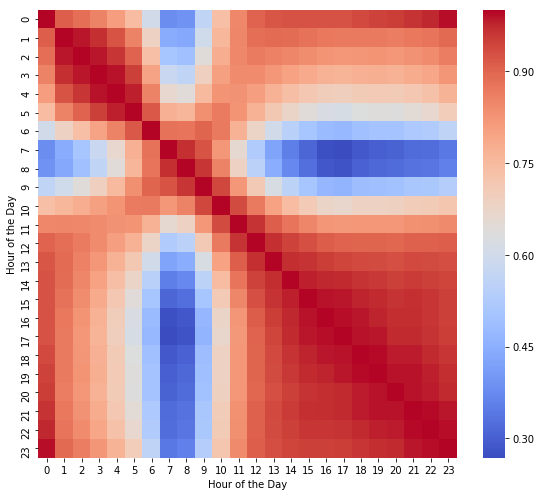

In [5]:
# Prepare a DataFrame to store correlations
correlation_matrix = pd.DataFrame(index=range(24), columns=range(24))

# Calculate correlations
for i in range(24):
    for j in range(24):
        hourly_data_i = df[df['hour'] == i]['Normalized Demand']
        hourly_data_j = df[df['hour'] == j]['Normalized Demand']
        correlation_matrix.loc[i, j] = np.corrcoef(np.array(hourly_data_i), np.array(hourly_data_j))[0,1]

# Convert the correlation matrix to numeric for plotting
correlation_matrix = correlation_matrix.astype(float)

# Plotting the heatmap
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
# plt.title('Hourly Load Value Correlation Heatmap')
plt.xlabel('Hour of the Day')
plt.ylabel('Hour of the Day')
plt.tight_layout()
plt.savefig("/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/SemesterReport/hour_correlation_heatmap.pdf", format="pdf", bbox_inches="tight")
plt.show()


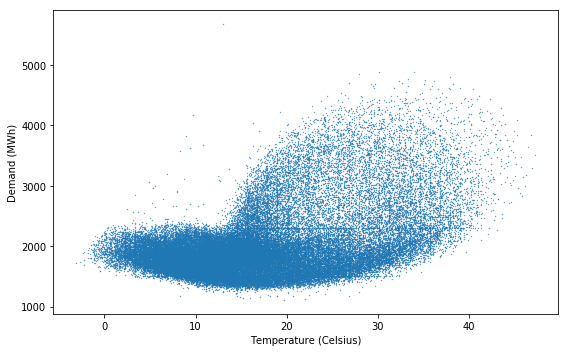

In [7]:
plt.figure(figsize=(8, 5))
plt.scatter(df["temperature"], df['Demand (MWh)'], s=0.1)
plt.ylabel('Demand (MWh)')
plt.xlabel('Temperature (Celsius)')
plt.tight_layout()
plt.savefig("/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/SemesterReport/temperature_demand_scatter.pdf", format="pdf", bbox_inches="tight")
plt.show()

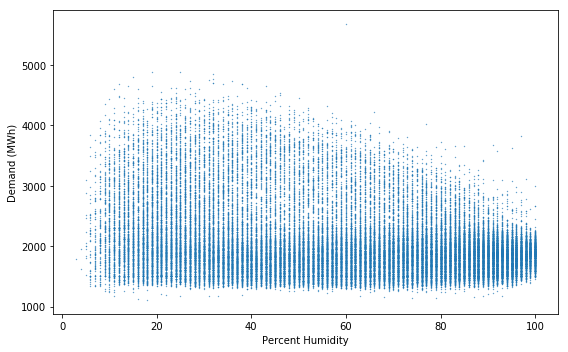

In [6]:
plt.figure(figsize=(8, 5))
plt.scatter(df["humidity"], df['Demand (MWh)'], s=0.1)
plt.ylabel('Demand (MWh)')
plt.xlabel('Percent Humidity')
plt.tight_layout()
plt.savefig("/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/SemesterReport/humidity_demand_scatter.pdf", format="pdf", bbox_inches="tight")
plt.show()

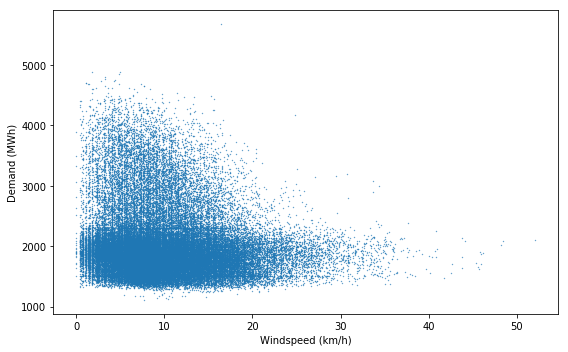

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(df["windspeed"], df['Demand (MWh)'], s=0.1)
plt.ylabel('Demand (MWh)')
plt.xlabel('Windspeed (km/h)')
plt.tight_layout()
plt.savefig("/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/SemesterReport/windspeed_demand_scatter.pdf", format="pdf", bbox_inches="tight")
plt.show()

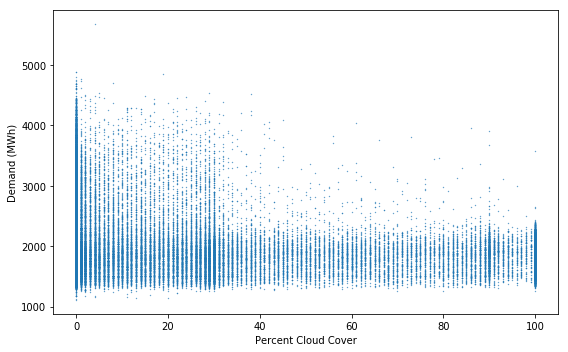

In [10]:
plt.figure(figsize=(8, 5))
plt.scatter(df["cloudcover"], df['Demand (MWh)'], s=0.1)
plt.ylabel('Demand (MWh)')
plt.xlabel('Percent Cloud Cover')
plt.tight_layout()
plt.savefig("/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/SemesterReport/cloudcover_demand_scatter.pdf", format="pdf", bbox_inches="tight")
plt.show()

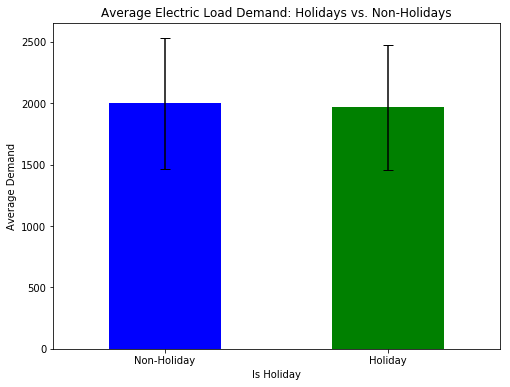

In [43]:
# Group by the holiday status and calculate the average demand and standard deviation
grouped = df.groupby('is_holiday')['Demand (MWh)']
average_demand = grouped.mean()
std_demand = grouped.std()

# Plotting
plt.figure(figsize=(8, 6))
average_demand.plot(kind='bar', yerr=std_demand, color=['blue', 'green'], capsize=5)
plt.title('Average Electric Load Demand: Holidays vs. Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Average Demand')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

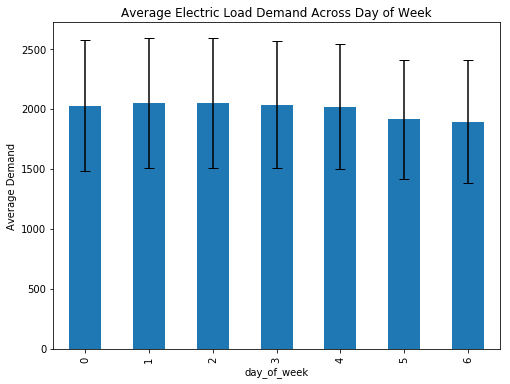

In [44]:
# Group by the holiday status and calculate the average demand and standard deviation
grouped = df.groupby('day_of_week')['Demand (MWh)']
average_demand = grouped.mean()
std_demand = grouped.std()

# Plotting
plt.figure(figsize=(8, 6))
average_demand.plot(kind='bar', yerr=std_demand, capsize=5)
plt.title('Average Electric Load Demand Across Day of Week')
# plt.xlabel('Is Holiday')
plt.ylabel('Average Demand')
# plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

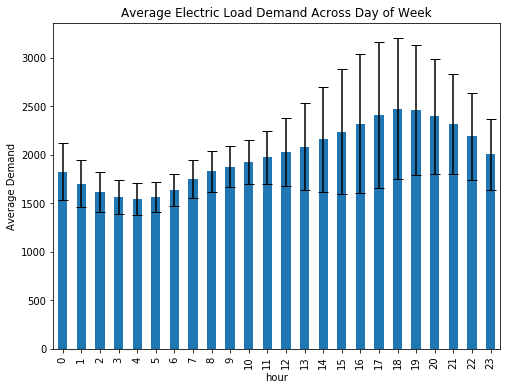

In [45]:
# Group by the holiday status and calculate the average demand and standard deviation
grouped = df.groupby('hour')['Demand (MWh)']
average_demand = grouped.mean()
std_demand = grouped.std()

# Plotting
plt.figure(figsize=(8, 6))
average_demand.plot(kind='bar', yerr=std_demand, capsize=5)
plt.title('Average Electric Load Demand Across Day of Week')
# plt.xlabel('Is Holiday')
plt.ylabel('Average Demand')
# plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

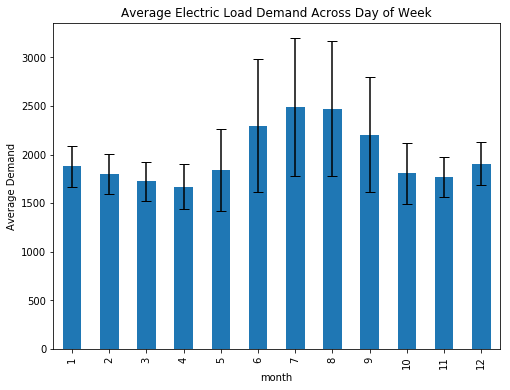

In [46]:
# Group by the holiday status and calculate the average demand and standard deviation
grouped = df.groupby('month')['Demand (MWh)']
average_demand = grouped.mean()
std_demand = grouped.std()

# Plotting
plt.figure(figsize=(8, 6))
average_demand.plot(kind='bar', yerr=std_demand, capsize=5)
plt.title('Average Electric Load Demand Across Day of Week')
# plt.xlabel('Is Holiday')
plt.ylabel('Average Demand')
# plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

In [10]:
df.groupby('is_holiday').head()

,timestamp,Demand (MWh),Demand Forecast (MWh),Net Generation (MWh),Region,Normalized Demand,temperature,humidity,cloudcover,windspeed,day_of_week,hour,is_holiday
0,2015-07-01 01:00:00,2513.0,2226.0,1559.0,banc,0.973518,38.5,18,10,8.7,2,1,0
1,2015-07-01 02:00:00,2275.0,2035.0,1441.0,banc,0.525176,37.7,19,12,10.4,2,2,0
2,2015-07-01 03:00:00,2104.0,1897.0,1399.0,banc,0.203049,35.4,23,11,10.7,2,3,0
3,2015-07-01 04:00:00,1988.0,1821.0,1354.0,banc,-0.015471,32.5,27,16,11.4,2,4,0
4,2015-07-01 05:00:00,1958.0,1811.0,1334.0,banc,-0.071984,30.3,31,21,9.0,2,5,0
47,2015-07-03 00:00:00,2235.0,2394.0,1430.0,banc,0.449825,33.7,28,82,12.8,4,0,1
48,2015-07-03 01:00:00,2052.0,2131.0,1338.0,banc,0.105092,32.9,31,81,13.0,4,1,1
49,2015-07-03 02:00:00,1891.0,1953.0,1299.0,banc,-0.198198,31.5,34,62,10.0,4,2,1
50,2015-07-03 03:00:00,1781.0,1834.0,1226.0,banc,-0.405415,29.5,38,66,8.9,4,3,1
51,2015-07-03 04:00:00,1717.0,1764.0,1177.0,banc,-0.525977,27.0,42,72,4.7,4,4,1


In [26]:
start=45000
df[start:start+240]

,timestamp,Demand (MWh),Demand Forecast (MWh),Net Generation (MWh),Region,Normalized Demand,temperature,humidity,cloudcover,windspeed,day_of_week,hour,is_holiday
45000,2020-08-18 01:00:00,2634.0,2636.0,2597.0,banc,1.201456,40.3,18,30,23.5,1,1,0
45001,2020-08-18 02:00:00,2464.0,2440.0,2307.0,banc,0.881212,38.4,20,30,18.4,1,2,0
45002,2020-08-18 03:00:00,2330.0,2300.0,2023.0,banc,0.628784,36.4,23,37,14.0,1,3,0
45003,2020-08-18 04:00:00,2262.0,2196.0,2068.0,banc,0.500687,35.5,23,34,15.1,1,4,0
45004,2020-08-18 05:00:00,2252.0,2156.0,2290.0,banc,0.481849,34.6,24,25,13.3,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45235,2020-08-27 20:00:00,3126.0,3201.0,3105.0,banc,2.128279,30.4,29,0,4.6,3,20,0
45236,2020-08-27 21:00:00,2974.0,3038.0,3229.0,banc,1.841944,32.7,24,0,4.4,3,21,0
45237,2020-08-27 22:00:00,2709.0,2796.0,2585.0,banc,1.342740,34.1,22,0,4.6,3,22,0
45238,2020-08-27 23:00:00,2417.0,2490.0,1964.0,banc,0.792674,34.8,21,0,5.9,3,23,0


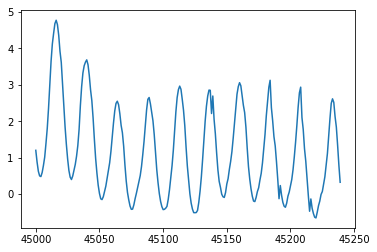

In [27]:
plt.plot(df['Normalized Demand'][start:start+240])

In [19]:
np.min(df['Normalized Demand']), np.max(df['Normalized Demand']), np.std(df['Normalized Demand'])

(-1.6694362246049934, 5.2120393832043, 0.9999923993387221)